# Project - Ford Go Bike 2019 Data Exploration and Visualization

## by (Ibrahim Sayed Ahmed)

## Table of Contents
<ul>
<li><a href="#intro">Preliminary Wrangling</a></li>
<li><a href="#clean">Data Cleaning</a></li>
<li><a href="#uni">Univariate Exploration</a></li>
<li><a href="#bi">Bivariate Exploration</a></li>
<li><a href="#multi">Multivariate Exploration</a></li>        
</ul>

<a id='intro'></a>
## Preliminary Wrangling

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.
This data set contains approximately 183000 individual entries of users posting their data regarding their bike rides.

In [67]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [68]:
# load data and show firt rows of it
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [69]:
# show the information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [70]:
# show summary statistics of the data
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [71]:
# Checking for null values
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [72]:
# Checking for duplicates
df.duplicated().sum()

0

<a id='clean'></a>
## Data Cleaning

- Remove data entries that contain null values.
- Change data type to datetime for columns 'start_time' and 'end_time'.
- Change data type to int for columns 'start_station_id' , 'end_station_id' and 'member_birth_year'.
- 'user_type'  and 'bike_id' can be changed into a categorical data type.
- Extracting time information form the 'start_time' and 'end_time' columns. We can derive information about the specific months, weekdays, hours from this aggregated data.

In [73]:
## Copy the current DataFrame into another to clean the data
df_clean = df.copy()

#### Remove data entries that contain null values.

In [74]:
# remove null values
df_clean.dropna(inplace=True)
df_clean.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

#### Change data type to datetime for columns 'start_time' and 'end_time'.

In [75]:
# Change data type to datetime
df_clean['start_time'] = pd.to_datetime(df_clean['start_time'])
df_clean['end_time'] = pd.to_datetime(df_clean['end_time'])

#### Change data type to int for columns 'start_station_id' , 'end_station_id' and 'member_birth_year'.

In [76]:
# Change data type to int 
df_clean['start_station_id'] = df_clean['start_station_id'].astype('int64')
df_clean['end_station_id'] = df_clean['end_station_id'].astype('int64')
df_clean['member_birth_year'] = df_clean['member_birth_year'].astype('int64')

#### 'user_type'  and 'bike_id' can be changed into a categorical data type.

In [77]:
# chang data into a categorical data type.
df_clean['user_type'] = df_clean['user_type'].astype('category')
df_clean['bike_id'] = df_clean['bike_id'].astype('category')

In [78]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  int64         
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  int64         
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  category      
 12  user_type       

#### Extracting time information form the 'start_time' and 'end_time' columns.

In [79]:
import datetime as dt
# Extract start and end date 
df_clean['start_date'] = df_clean['start_time'].dt.date
df_clean['end_date'] = df_clean['end_time'].dt.date

In [80]:
# Extract start and end hour
df_clean['start_hour'] = df_clean['start_time'].dt.hour
df_clean['end_hour'] = df_clean['end_time'].dt.hour

In [81]:
# Extract start and end days
df_clean['start_dayofweek'] = df_clean['start_time'].dt.strftime('%A')
df_clean['end_dayofweek'] = df_clean['end_time'].dt.strftime('%A')

In [82]:
# Extract start and end months
df_clean['start_month'] = df_clean['start_time'].dt.month_name().str.slice(stop=3)
df_clean['end_month'] = df_clean['end_time'].dt.month_name().str.slice(stop=3)

In [83]:
# Convert the duration in seconds to minutes for proper analysis.
df_clean['duration_min']=df_clean['duration_sec']/60

In [84]:
# add a new column calculating riders' age from 'member_birth_year'
df_clean['member_age'] = 2019 - df_clean['member_birth_year']

In [85]:
df_clean.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,start_date,end_date,start_hour,end_hour,start_dayofweek,end_dayofweek,start_month,end_month,duration_min,member_age
102068,203,2019-02-14 17:02:00.053,2019-02-14 17:05:23.840,11,Davis St at Jackson St,37.797280,-122.398436,13,Commercial St at Montgomery St,37.794231,...,2019-02-14,2019-02-14,17,17,Thursday,Thursday,Feb,Feb,3.383333,24
133938,613,2019-02-08 18:05:22.017,2019-02-08 18:15:35.920,343,Bryant St at 2nd St,37.783172,-122.393572,13,Commercial St at Montgomery St,37.794231,...,2019-02-08,2019-02-08,18,18,Friday,Friday,Feb,Feb,10.216667,52
139022,796,2019-02-07 23:08:12.073,2019-02-07 23:21:29.035,349,Howard St at Mary St,37.781010,-122.405666,78,Folsom St at 9th St,37.773717,...,2019-02-07,2019-02-07,23,23,Thursday,Thursday,Feb,Feb,13.266667,21
43369,864,2019-02-22 16:33:37.846,2019-02-22 16:48:01.978,90,Townsend St at 7th St,37.771058,-122.402717,105,16th St at Prosper St,37.764285,...,2019-02-22,2019-02-22,16,16,Friday,Friday,Feb,Feb,14.400000,39
42672,870,2019-02-22 17:14:16.400,2019-02-22 17:28:47.172,81,Berry St at 4th St,37.775880,-122.393170,77,11th St at Natoma St,37.773507,...,2019-02-22,2019-02-22,17,17,Friday,Friday,Feb,Feb,14.500000,38


#### Select the columns which won't be useful in further visualizations and drop them.

In [86]:
# delete some columns which won't be useful in further visualizations.
df_clean.drop(['start_station_name','duration_sec','start_station_latitude','start_time',
               'end_time' ,'start_station_longitude','end_station_name', 'end_station_latitude',
               'end_station_longitude'], axis = 1, inplace=True)

In [87]:
df_clean.head()

,start_station_id,end_station_id,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_date,end_date,start_hour,end_hour,start_dayofweek,end_dayofweek,start_month,end_month,duration_min,member_age
0,21,13,4902,Customer,1984,Male,No,2019-02-28,2019-03-01,17,8,Thursday,Friday,Feb,Mar,869.750000,35
2,86,3,5905,Customer,1972,Male,No,2019-02-28,2019-03-01,12,5,Thursday,Friday,Feb,Mar,1030.900000,47
3,375,70,6638,Subscriber,1989,Other,No,2019-02-28,2019-03-01,17,4,Thursday,Friday,Feb,Mar,608.166667,30
4,7,222,4898,Subscriber,1974,Male,Yes,2019-02-28,2019-03-01,23,0,Thursday,Friday,Feb,Mar,26.416667,45
5,93,323,5200,Subscriber,1959,Male,No,2019-02-28,2019-03-01,23,0,Thursday,Friday,Feb,Mar,29.883333,60


### What is the structure of your dataset?

> There are 183412  ride data from 2019 in the dataset with 16 features (ride duration, start and end time, start station id ,name,latitude and longitude  end station id ,name,latitude and longitude , bike id, user type, birth year,bike_share_for_all_trip and gender). I extracted specific data and formed new columns out of the start_time and end_time columns. 

### What is/are the main feature(s) of interest in your dataset?

> I'm most interested in figuring out what features are best for predicting the duration of the trip. 
Here are some questions I wish to answer:

- How long does average trip take?
- Does User Type (Subscriber or Customer) affect the duration?
- Do Age and Sex of user affect the duration?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> According to the dataset, the features like Start Date, Time, Month, Duration of Trip and User Type will have the strongest effect on Bike Trips.

<a id='uni'></a>
## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In [88]:
# set color for plotting
base_color = sb.color_palette()[0]

### which gender use the service more

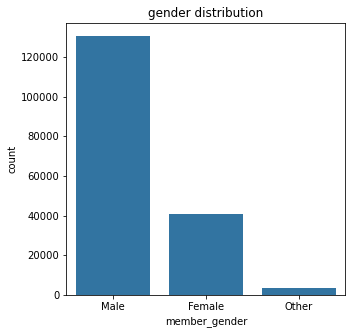

In [89]:
# gender distribution
plt.figure(figsize=[5,5])
order = df_clean['member_gender'].value_counts().index
sb.countplot(data = df_clean , x='member_gender',color = base_color , order = order)
plt.title('gender distribution');

- It seems that males using the service more than female.

In [90]:
# set order for days of week
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']
week = pd.api.types.CategoricalDtype(ordered=True, categories=days_of_week)
df_clean['start_dayofweek'] = df_clean['start_dayofweek'].astype(week)

### which days the service used more

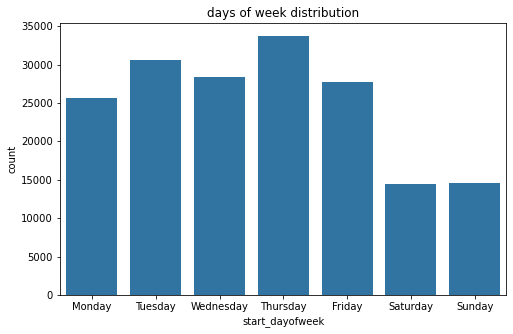

In [91]:
plt.figure(figsize=[8,5])
sb.countplot(data = df_clean, x = 'start_dayofweek', color = base_color)
plt.title('days of week distribution');

- The service is used more during weekdays than weekends
- Tue, Wed, Thu see the peak usage of this service

### what is the different amount of user types

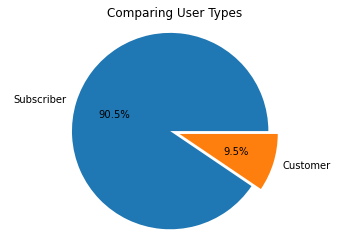

In [92]:
## Comparing the different amount of user types
user_type_count = df_clean['user_type'].value_counts()
plt.pie(user_type_count, labels = user_type_count.index,autopct='%1.1f%%', explode = (0, 0.1))
plt.axis('equal')
plt.title('Comparing User Types');

- It seems that subscribers used this service more than customers.

### which hours the service used more on

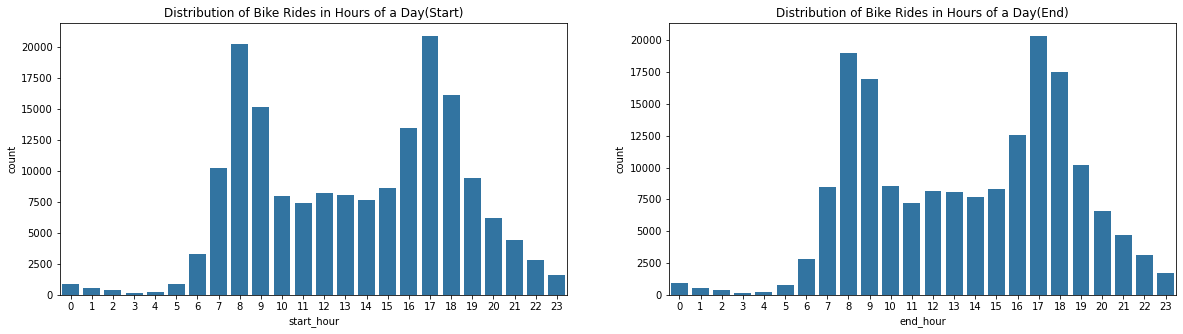

In [93]:
## Distribution of bike rides across all hours of the day(Start)
plt.figure(figsize=[20,5])
plt.subplot(1, 2, 1) 
sb.countplot(data = df_clean, x = 'start_hour', color = base_color)
plt.title('Distribution of Bike Rides in Hours of a Day(Start)');

## Distribution of individual bike rides across all hours of the day(End)
plt.subplot(1, 2, 2)
sb.countplot(data = df_clean, x = 'end_hour', color = base_color)
plt.title('Distribution of Bike Rides in Hours of a Day(End)');

- It seems that trips is more in morning 7 to 9 am and in afternoon 5 to 7 pm , it is more logic because this is the time of going to work and back home after work.

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> - I found that male used the service more than female. 
> - The service is used more during weekdays than weekends 
> - subscribers used this service more than customers . 
> - It seems that trips is more in morning 7 to 9 am and in afternoon 5 to 7 pm. 
> - No transformation was needed luckily due to the straightforwardness of the data.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I cleaned the features of the dataset for better visualization. For, extracting week, hour, time from the given Start_time, I changed its datatype. For, better visualization, I changed the duration in seconds to duration in minutes. I also dropped some of the columns which were not in use.

<a id='bi'></a>
## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

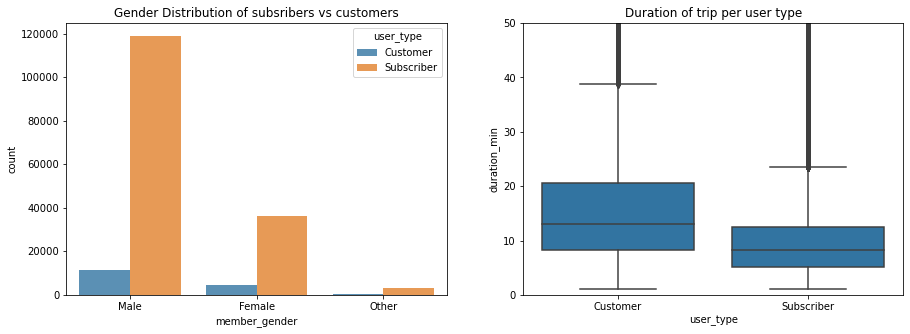

In [94]:
plt.figure(figsize = [15, 5]) 
plt.subplot(1, 2, 1) 
sb.countplot(data = df_clean , x='member_gender',hue = 'user_type'  , order = order,alpha = 0.8)
plt.title('Gender Distribution of subsribers vs customers');

plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2

sb.boxplot(data = df_clean, x = 'user_type', y = 'duration_min', color = base_color)
plt.ylim(0,50)
plt.title('Duration of trip per user type');


- Males use this service and be subsribers more than Females.
- Customers take trips longer compared to subscribers.
- It seems like subscribers have a more specific usage or targeted goal riding the bikes compared to customers who vary more and generally rented the bikes for longer.

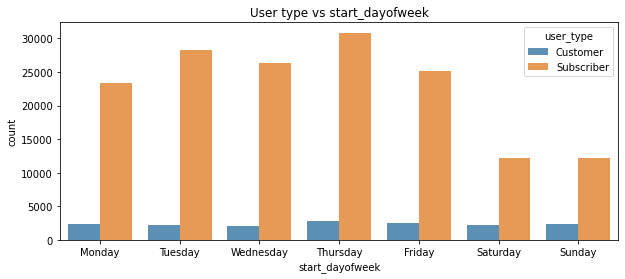

In [95]:
plt.figure(figsize = [10, 4]) 
sb.countplot(data=df_clean, x='start_dayofweek', hue='user_type',alpha = 0.8)
plt.title('User type vs start_dayofweek');

- It is found that subscribers used the service on weekdays more than weekends

### Average Trip Duration on Weekdays

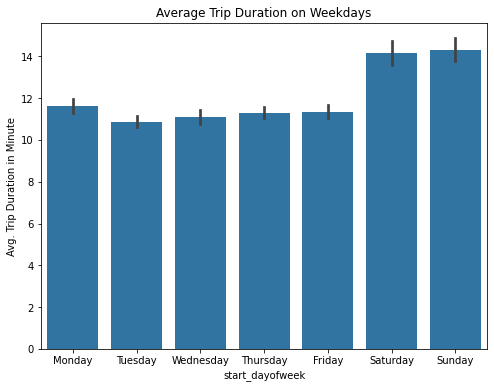

In [96]:
plt.figure(figsize=[8, 6])
sb.barplot(data=df_clean, x='start_dayofweek', y='duration_min', color=base_color);
plt.ylabel('Avg. Trip Duration in Minute')
plt.title('Average Trip Duration on Weekdays');

- The riding trips are much shorter on Monday through Friday compared to weekends. It indicates a stable and efficient usage of the sharing system on normal work days, while more casual flexible use on weekends.

### Member age between customers and subscribers

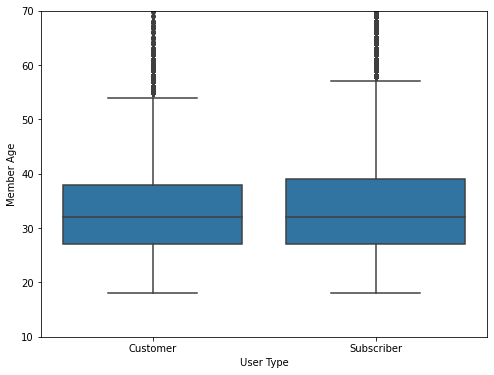

In [97]:
plt.figure(figsize=[8, 6])
sb.boxplot(data=df_clean, x='user_type', y='member_age', color=base_color)
plt.ylim(10,70)
plt.xlabel('User Type');
plt.ylabel('Member Age');

- Most members were around 25 to 40 years old, as the age gets older, bike usage dropped significantly. 
- subscribers who ride most often Monday through Friday are slightly older than customers

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> - Customers take trips longer compared to subscribers.
> - It seems like subscribers have a more specific usage or targeted goal riding the bikes compared to customers who vary more and generally rented the bikes for longer. 
> - Subscribers use the bike sharing system for work commnute thus most trips were on work days and when going to work in morning 7 to 9 am and getting off work in the afternoon 5 to 7 pm.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> It is interesting to see that subscribers are slightly older than customers on average but take much shorter/quicker rides.

<a id='multi'></a>
## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### How does the average trip duration vary in weekdays between customers and subscribers?

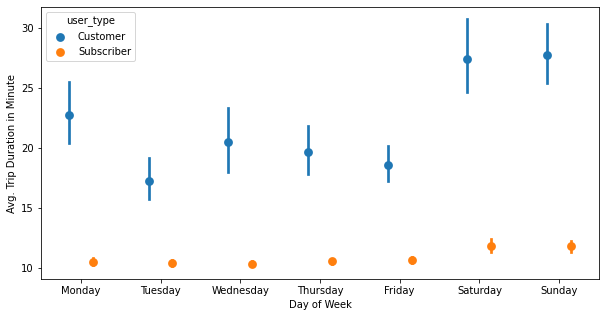

In [98]:
plt.figure(figsize=[10, 5])
sb.pointplot(data=df_clean, x='start_dayofweek', y='duration_min', hue='user_type',dodge=0.3, linestyles="");
plt.xlabel('Day of Week');
plt.ylabel('Avg. Trip Duration in Minute');

- The above graph shows that subscribers take significantly shorter/quicker trips than customers on each day of the week. On Saturdays and Sundays, both user types have a noticeable increase in trip duration over weekends, particularly casual riders. Subscribers seem to be more effective than consumers in general, with a very consistent average period from Monday to Friday.

### how the average trip time is affected by gender

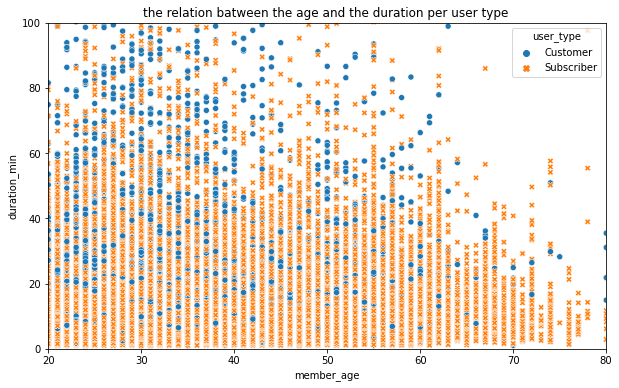

In [99]:
plt.figure(figsize=(10,6))
sb.scatterplot(data = df_clean, x="member_age", y="duration_min", hue="user_type", style="user_type" )
plt.xlim(20,80)
plt.ylim(0,100)
plt.title('the relation batween the age and the duration per user type ');

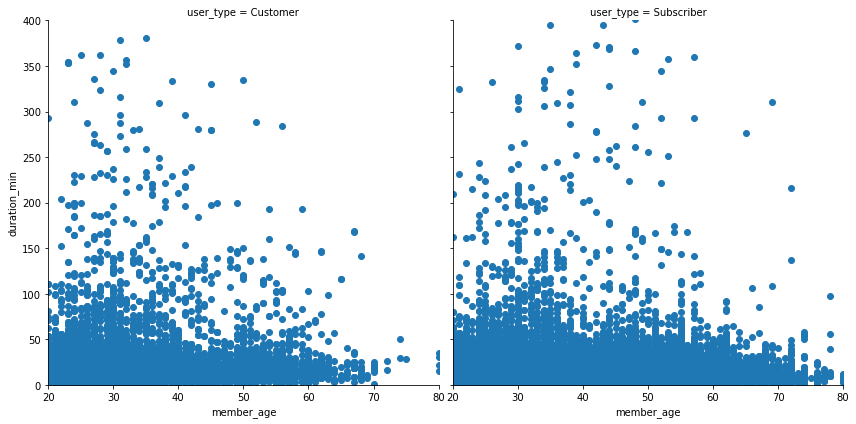

In [100]:
# Finding out how the average trip time is affected by user_type.
a = sb.FacetGrid(data =  df_clean, col = 'user_type', height = 6)
a.map(plt.scatter, 'member_age','duration_min')
plt.xlim(20,80)
plt.ylim(0,400);

- from the two charts above, I found that the trip duration doesn't differ from customer to subscriber, as for both types the duration decreases when the age increases. But found that the age of the subscribers is more than the age of the customers.

### Correlation Matrices

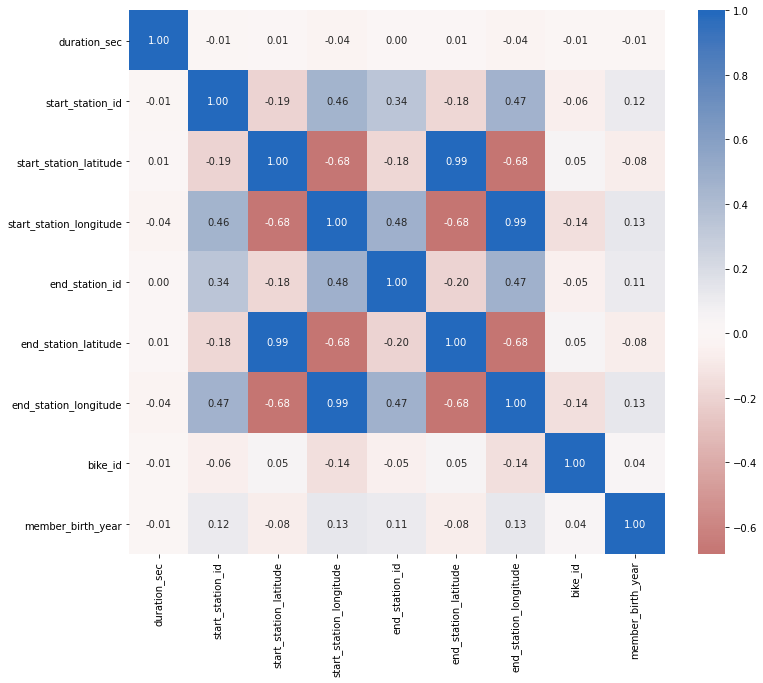

In [101]:
plt.figure(figsize = [12, 10])
sb.heatmap(df.corr(), annot = True, fmt = '.2f',
           cmap = 'vlag_r', center = 0);

- checking the correlation between some of the variables

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> - The relationship between the multiple variables plotted are visualized altogether and information are presented. The short period of usage for subscribers corresponds to their high concentration on rush hours Monday through Friday, which is for work.

  
### Were there any interesting or surprising interactions between features?

> The interactions between features are all supplementing each other and quite make sense when looked at combined, We can conclude that subscribers usually use the bikes as a main source of transportation for work while customers are perhaps people who use bike as a secondary mean to get to work or people who bike around on their leisure time.


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

In [102]:
# save the cleaned data 
df_clean.to_csv('201902-fordgobike-tripdata-clean.csv',index=False)